# LetsGrowMore

TASK 1: STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

DONE BY: MEERA P V

#### IMPORT REQUIRED LIBRARIES

In [84]:
import numpy as np
from numpy import array
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#### IMPORT DATASET

In [35]:
data = pd.read_excel("data.xlsx")
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


#### EDA

In [36]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [37]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [38]:
data.shape

(2035, 8)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [40]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [41]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [42]:
data.index

RangeIndex(start=0, stop=2035, step=1)

In [43]:
data.size

16280

In [44]:
#sorting with date
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [45]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [47]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


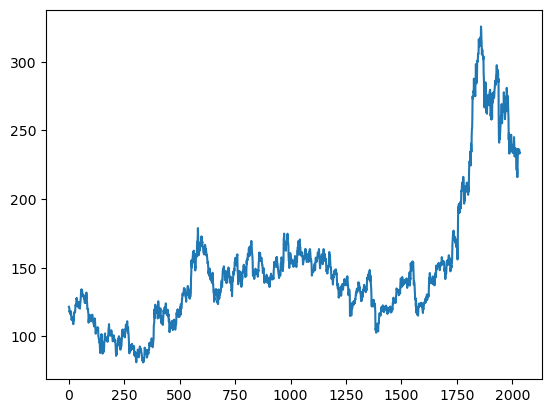

In [50]:
plt.plot(df['Close'])
plt.show()

In [53]:
df1=df.reset_index()['Close']

In [56]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [57]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [58]:
df1.shape

(2035, 1)

#### Train and Test Split

In [59]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [60]:
training_size,test_size

(1424, 611)

#### PRE-PROCESSING

In [61]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [62]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [63]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [64]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [65]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#### MODEL BUILDING

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [67]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 10s 272ms/step - loss: 0.0109 - val_loss: 0.0012
Epoch 2/60
19/19 [==============================] - 4s 206ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 3s 146ms/step - loss: 9.2828e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 3s 146ms/step - loss: 8.5459e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 4s 191ms/step - loss: 8.0509e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 4s 214ms/step - loss: 7.8467e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 146ms/step - loss: 7.6655e-04 - val_loss: 9.9449e-04
Epoch 8/60
19/19 [==============================] - 3s 133ms/step - loss: 7.5315e-04 - val_loss: 9.5516e-04
Epoch 9/60
19/19 [==============================] - 3s 177ms/step - loss: 7.2293e-04 - val_loss: 9.1603e-04
Epoch 10/60
19/19 [==============================] - 4s 183

#### MODEL EVALUATION

In [69]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [70]:
## Transform back to original form 
train_predict1=scaler.inverse_transform(train_predict)
test_predict2=scaler.inverse_transform(test_predict)

In [71]:
train_predict1

array([[0.14267664],
       [0.13661174],
       [0.1328834 ],
       ...,
       [0.16610996],
       [0.16276704],
       [0.15993936]], dtype=float32)

In [73]:
test_predict2

array([[0.25666553],
       [0.25775993],
       [0.25499946],
       [0.24556705],
       [0.2381787 ],
       [0.23456919],
       [0.23751462],
       [0.2432623 ],
       [0.2460019 ],
       [0.2458207 ],
       [0.24526429],
       [0.24908793],
       [0.2522385 ],
       [0.25806966],
       [0.2664454 ],
       [0.26132333],
       [0.25252587],
       [0.24924341],
       [0.25002995],
       [0.26654872],
       [0.28431985],
       [0.29575264],
       [0.29996315],
       [0.29417172],
       [0.29207185],
       [0.29004663],
       [0.2904805 ],
       [0.2959282 ],
       [0.29948175],
       [0.30059952],
       [0.30241415],
       [0.29904324],
       [0.28780288],
       [0.26675865],
       [0.25110918],
       [0.244095  ],
       [0.24284708],
       [0.24015479],
       [0.23263079],
       [0.21950321],
       [0.20879108],
       [0.20244642],
       [0.19389492],
       [0.18945554],
       [0.18162344],
       [0.17141199],
       [0.16704781],
       [0.164

In [74]:
## Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

0.01568603010923636

In [76]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

0.01568603010923636

In [77]:
## Calculate RMSE performance metrics (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

0.03569484231680933

In [78]:
### Test Data RMSE (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

0.03569484231680933

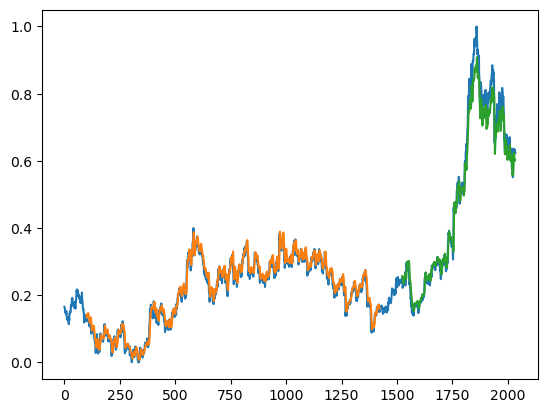

In [79]:
### PLotting
#Shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#Shift test prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Green indicates the Predicted Data, Blue indicates the Complete Data and Orange indicates the Train Data

In [80]:
len(test_data)

611

In [81]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [82]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [83]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [85]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.60349506]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

9 day output [[0.54829663]]
10 day input [0.67892157 0.69138072 0.70894608 0.72263072 0.73406863 0.72120098
 0.74979575 0.7689951  0.74468954 0.7120098  0.74673203 0.75490196
 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582
 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183
 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915
 0.81719771 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667
 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935
 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758
 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948
 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098
 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745
 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974
 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464
 0.55167484 0.57883987 0.625      0.63582516 0.62949346 0.62888072
 0.62765523 0.62234477

18 day input [0.74468954 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392
 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765
 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791
 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333
 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523
 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951
 0.66319444 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098
 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013
 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882
 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634
 0.62254902 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908
 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987
 0.625      0.63582516 0.62949346 0.62888072 0.62765523 0.62234477
 0.63378268 0.62622549 0.62214052 0.62418301 0.60349506 0.59578979
 0.585531   0.57602316 0.56815672 0.56199461 0.5573

 0.49897215 0.49647236 0.49418613 0.49204156]
26 day output [[0.48997813]]
27 day input [0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052
 0.62418301 0.60349506 0.59578979 0.585531   0.57602316 0.56815672
 0.56199461 0.55732131 0.55377162 0.55090

In [86]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [87]:
len(df1)

2035

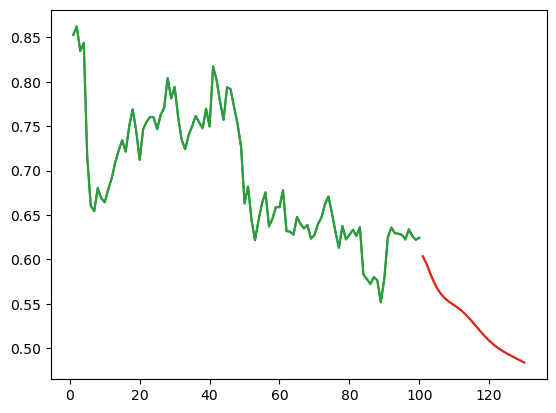

In [89]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

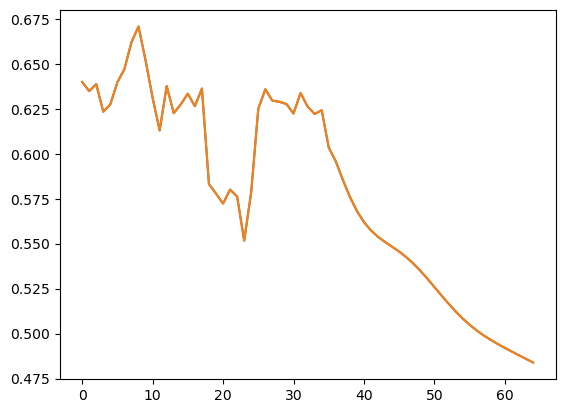

In [91]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])
plt.show()

In [92]:
df3=scaler.inverse_transform(df3).tolist()

In [93]:
plt.plot(df3)

#### RESULT

The results of the Stock Market Prediction and Forecasting project depend on the specific implementation and training of the Stacked LSTM model. By training the model on historical stock price data, we can obtain predictions and forecasts for future stock prices.

The performance of the model can be analyzed using evaluation metrics such as mean absolute error (MAE) and root mean squared error (RMSE). Lower values of these metrics indicate better predictive accuracy. Additionally, visualizations, such as line plots, can be used to compare the predicted and actual stock prices, providing a visual assessment of the model's performance.